In [3]:
#Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy


In [5]:
#Importando arquivo
from google.colab import files
arquivo = files.upload()

Saving Telco-Customer-Churn.csv to Telco-Customer-Churn.csv


In [6]:
df = pd.read_csv('Telco-Customer-Churn.csv')

In [8]:
df_val = df.iloc[:10]
df_val

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [9]:
#Retirar o campo customerID
df.drop('customerID', 1, inplace=True)

In [10]:
#Verifica tipos
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
#Altera TotalCharges
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors="coerce")

In [13]:
#Verifica Vazios
df.TotalCharges.isna()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [16]:
#Ver campos vazios
df[df.TotalCharges.isna()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [17]:
#Exclusao dos campos vazios de TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

In [18]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


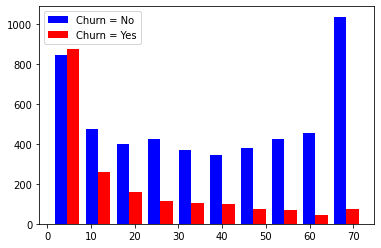

In [19]:
#Grafico para analise de tenure
dfno = df[df.Churn=='No'].tenure
dfyes = df[df.Churn=='Yes'].tenure

plt.hist([dfno, dfyes], color=['blue', 'red'], label=['Churn = No', 'Churn = Yes'])
plt.legend()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


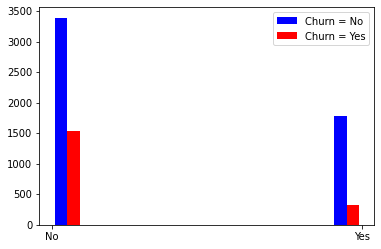

In [20]:
#Grafico dependentes

dfno = df[df.Churn=='No'].Dependents
dfyes = df[df.Churn=='Yes'].Dependents

plt.hist([dfno, dfyes], color=['blue', 'red'], label=['Churn = No', 'Churn = Yes'])
plt.legend()

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


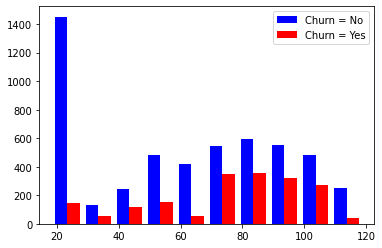

In [21]:
#Grafico de MonthlyCharges
dfno = df[df.Churn=='No'].MonthlyCharges
dfyes = df[df.Churn=='Yes'].MonthlyCharges

plt.hist([dfno, dfyes], color=['blue', 'red'], label=['Churn = No', 'Churn = Yes'])
plt.legend()

NO: 5163 YES: 1869  % No: 26.58


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


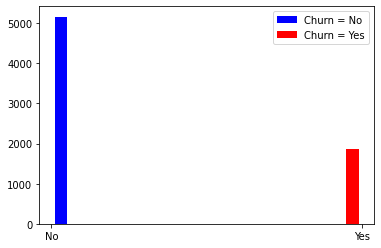

In [27]:
#Balanceamento do dataset
dfno = df[df.Churn=='No'].Churn
dfyes = df[df.Churn=='Yes'].Churn

total = dfno.count() + dfyes.count()
percent = round((dfyes.count() / total) * 100 , 2)

print(f'NO: {dfno.count()}', f'YES: {dfyes.count()}', f' Yesr % No: {percent}')

plt.hist([dfno, dfyes], color=['blue', 'red'], label=['Churn = No', 'Churn = Yes'])
plt.legend()

In [28]:
#Verifica padrao
for i in df:
  if df[i].dtypes == 'object':
    print(f'{i} : {df[i].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [29]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [30]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [32]:
dfnum = pd.get_dummies(data=df, columns=['gender','InternetService', 'Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod'])
dfnum.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No', 'Partner_No',
       'Partner_Yes', 'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_Yes', 'TechSupport_No', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_Yes', 'StreamingMovies_No',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_

In [33]:
dfnum.sample(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
3192,0,58,19.15,1035.50,No,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,1,0,0,0
4742,0,72,20.80,1521.20,No,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1
5585,0,1,19.30,19.30,Yes,0,1,0,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
4210,1,61,65.20,3965.05,No,1,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0
2641,1,5,59.90,287.85,No,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,0


In [36]:
#Label Encoder / Transforma Yes ou No de Churn em 1 ou 0
le = LabelEncoder()
dfnum['Churn'] = le.fit_transform(dfnum['Churn'])
dfnum.Churn.sample(15)

469     1
6273    1
6059    0
3337    0
2490    0
5648    0
3142    1
1192    1
2002    0
5804    0
2114    0
6619    0
6554    1
735     0
5063    1
Name: Churn, dtype: int64

In [37]:
scaler = MinMaxScaler()
dfnum[['tenure','MonthlyCharges','TotalCharges']] = scaler.fit_transform(dfnum[['tenure','MonthlyCharges','TotalCharges']])
dfnum.sample(5)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2247,0,0.549296,0.013930,0.093636,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0
1318,0,0.098592,0.482090,0.064643,0,0,1,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0
3410,0,0.028169,0.349751,0.019605,1,0,1,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,0
4128,0,0.788732,0.209453,0.241478,1,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,0,1,0
3701,0,0.366197,0.062189,0.085755,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0


In [38]:
#Separar features e labels
features = dfnum.drop(['Churn'], 1)
label = dfnum['Churn']


In [39]:
#Parte para validação
val = features.head(10)
val

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.000000,0.115423,0.001275,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
1,0,0.464789,0.385075,0.215867,0,1,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1
2,0,0.014085,0.354229,0.010310,0,1,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1
3,0,0.619718,0.239303,0.210241,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,0
4,0,0.014085,0.521891,0.015330,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0
5,0,0.098592,0.809950,0.092511,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0
6,0,0.295775,0.704975,0.222779,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0
7,0,0.126761,0.114428,0.032668,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,1
8,0,0.380282,0.861194,0.349325,1,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0
9,0,0.859155,0.377114,0.400317,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0


In [40]:
#Novo feature
features = features.iloc[10:]
label = label.iloc[10:]


In [41]:
#Separa entre treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=.20, random_state=42)

In [42]:
model = Sequential([
Dense(20, input_shape=(41,), activation='relu'),
Dense(52, activation='relu'),
Dense(1, activation='sigmoid')
])

#Passando parametro de execução
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [43]:
#Treinamento

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5697 - accuracy: 0.7059
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4329 - accuracy: 0.7886
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4278 - accuracy: 0.8054
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4297 - accuracy: 0.8003
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4143 - accuracy: 0.8074
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4148 - accuracy: 0.8031
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4144 - accuracy: 0.8058
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4161 - accuracy: 0.8039
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4049 - accuracy: 0.8126
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4076 - accura

In [44]:
pred_val = model.predict(val)
print(pred_val)

[[0.64005387]
 [0.04962763]
 [0.13410524]
 [0.0344916 ]
 [0.62613237]
 [0.9451728 ]
 [0.79187   ]
 [0.07330334]
 [0.7734761 ]
 [0.02559435]]


In [49]:
y_pred = []
for i in pred_val:
  if i > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

cliente = df_val['customerID']
real = df_val['Churn']
pred = list(pred_val.flatten())

df = pd.DataFrame({'cliente':cliente, 'previsao': pred, 'real':real, 'churn':y_pred})

print(df)

      cliente  previsao real  churn
0  7590-VHVEG  0.640054   No      1
1  5575-GNVDE  0.049628   No      0
2  3668-QPYBK  0.134105  Yes      0
3  7795-CFOCW  0.034492   No      0
4  9237-HQITU  0.626132  Yes      1
5  9305-CDSKC  0.945173  Yes      1
6  1452-KIOVK  0.791870   No      1
7  6713-OKOMC  0.073303   No      0
8  7892-POOKP  0.773476  Yes      1
9  6388-TABGU  0.025594   No      0


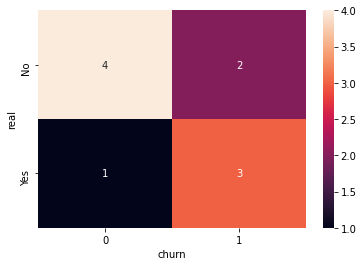

In [50]:
import seaborn as sns

df = pd.DataFrame(df, columns=['real', 'churn'])
confusion_matrix = pd.crosstab(df['real'], df['churn'], rownames=['real'], colnames=['churn'])

sns.heatmap(confusion_matrix, annot=True)